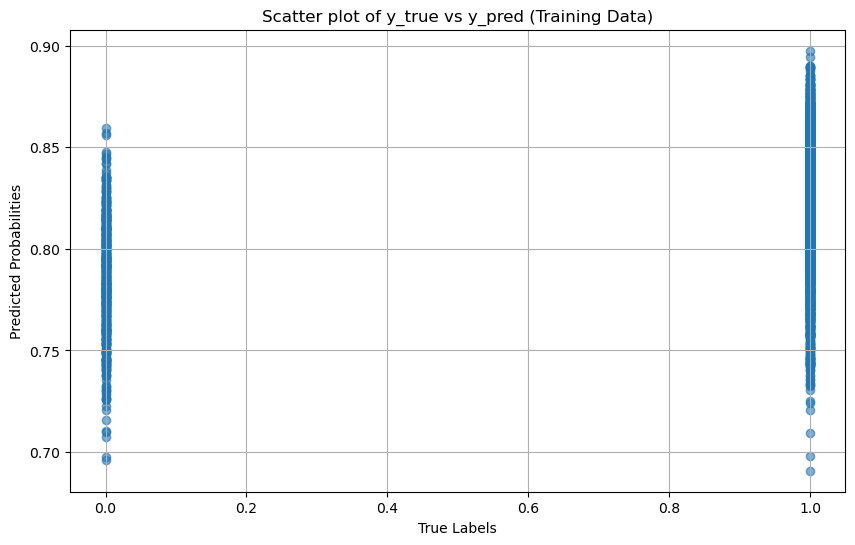

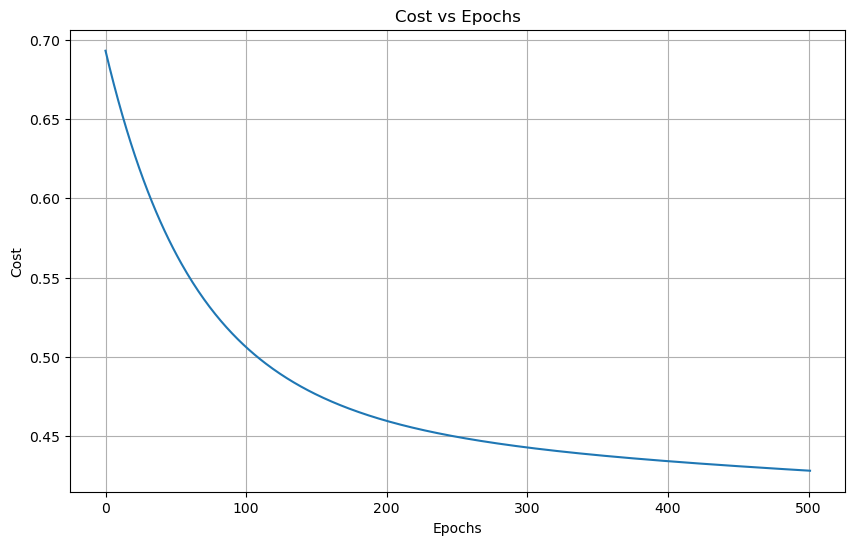

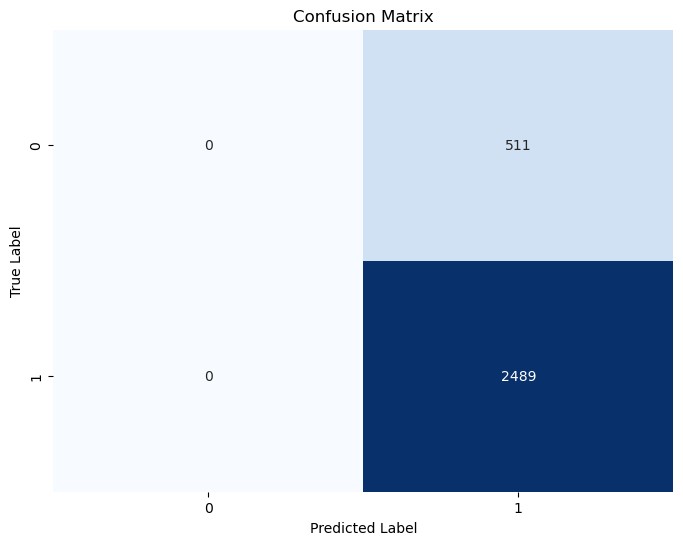

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Logistic Regression implementation
class LogisticRegression:
    def __init__(self, learning_rate=0.01, max_iter=1000, early_stopping_rounds=None, tol=1e-4):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.weights = None
        self.bias = None
        self.cost_history = []
        self.early_stopping_rounds = early_stopping_rounds
        self.tol = tol

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def compute_cost(self, y_true, y_pred):
        m = y_true.shape[0]
        return -1/m * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    
    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for i in range(self.max_iter):
            model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(model)

            dw = 1/m * np.dot(X.T, (y_pred - y))
            db = 1/m * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            cost = self.compute_cost(y, y_pred)
            self.cost_history.append(cost)

            if self.early_stopping_rounds:
                if i > self.early_stopping_rounds:
                    if abs(self.cost_history[-1] - self.cost_history[-2]) < self.tol:
                        break

    def predict_proba(self, X):
        model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(model)
    
    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)

# Load the training and test data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Prepare the data
X_train = train_df.iloc[:, :-1].values
y_train = train_df.iloc[:, -1].values
X_test = test_df.values

# Initialize and train the logistic regression model
log_reg = LogisticRegression(learning_rate=0.01, max_iter=1000, early_stopping_rounds=500, tol=1e-4)
log_reg.fit(X_train, y_train)

# Predict on training data and plot y_true vs y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_train, log_reg.predict_proba(X_train), alpha=0.6)
plt.title('Scatter plot of y_true vs y_pred (Training Data)')
plt.xlabel('True Labels')
plt.ylabel('Predicted Probabilities')
plt.grid(True)
plt.show()

# Plot of cost vs epochs
plt.figure(figsize=(10, 6))
plt.plot(log_reg.cost_history)
plt.title('Cost vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

# Generate and plot confusion matrix
y_pred_train = log_reg.predict(X_train)
cm = confusion_matrix(y_train, y_pred_train)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Predict on test data and save to CSV
y_pred_test = log_reg.predict_proba(X_test)
np.savetxt("y_pred_new.csv", y_pred_test, delimiter=",")
